# Assignment 10
#### Due November 25, 2020, 23:59

In this week's assignment, you will be building a machine learning model for classification, and test the performance of your model. Namely, you will be using the scikit-learn implementation of the K-Nearest Neighbour classification algorithm to predict the class of iris flowers and plot the accuracy of your model.

We will return to the famous iris dataset from assignment 5. The data is once again given in the file `iris.data` which contains the collection of iris flowers, one flower per row, each described by four attributes and the class it belongs to:

1. sepal length in cm
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class:
    - 0 = Iris Setosa
    - 1 = Iris Versicolour
    - 2 = Iris Virginica

<img src="img/iris.png" width="600">

You can find more details on the dataset [here](https://archive.ics.uci.edu/ml/datasets/iris).


___
### K-Nearest Neighbor

K-Nearest Neighbor, KNN, is a simple supervised classification algorithm which we can use to assign a class to a new unseen data point. It stores all available data points, and classifies a new unseen data point based on how the majority of its neighbours are labelled. You can imagine the data as being plotted in an N-dimensional scatter plot, where N is equal to the number of attributes describing the data.

KNN can be summarized like this:
1. Compute the distance between the new unseen data point and every existing data point.
2. Pick the *k* datapoints which are closest to the new data point.
3. Assign the class of the new data point based on the majority vote, i.e the most common class among the *k* nearest data points will be the class of the new data point.

This process is visualised in the figure below for two classes, A and B, described by two features, x<sub>1</sub> and x<sub>2</sub>, for the values of k = 3 and k = 7.

<img src="img/knn.png" width="800">

Like most machine learning algorithms, the *k* in KNN is a hyperparameter that you, as a data scientist, must decide for the specific task to get the most suitable fit for the data set. You won't have to choose a specific value of *k* for this assignment, but you will inspect the performance of your model for different values of *k*.
- When *k* is small, we get a complex model, but it might **overfit** to our data, meaning it will be extremely specific to the data it is trained on, and probably won't generalise well to new unseen data.
- A higher value of *k* gets you a less complex model. Here you risk to **underfit** your model, which means your might not be capturing the relationship between your features and your classes too well. This model will generalise better to unseen data, but at the risk of its performance just being consistently bad.

In general for KNN, as the value of *k* increases there will be a rise in test accuracy and then it will fall again. Our model gets the best performance when we hit the sweet spot between overfitting and underfitting.

<img src="img/overunder.png" width="500">

___

## Submission

Edit and turn in this jupyter notebook file containing your solutions to each task.  
Implement your solution to each of the exercises in the code field below the exercise description.  

Make sure that we are able to run the notebook by placing our own copy of `iris.data` inside the same folder as this notebook.

The libraries you may need are already given, any extra imports are not allowed.



## Assignment

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Exercise 1
We'll begin by loading the data from the file `iris.data` into a numpy array.  
Extract the attributes (sepal length, sepal width, petal length, and petal width) into a matrix, `X`, and the target class into a column vector, `y`. 

**NB!** `iris.data` is formatted as a whitespace-delimited data file and can be loaded using `np.loadtxt()` with default parameters.


___
`X.shape`  
\>\> `(150,4)`

`y.shape`  
\>\> `(150,)`

In [2]:
iris_data = np.loadtxt("iris.data")

X, y = iris_data[:,:-1], iris_data[:,-1]

# expected output
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Exercise 2
Training and testing on the same data is not a good idea, so we split the data into two parts: training set and test set.  Since we are training and testing on different sets of data, the resulting test accuracy will be a better estimate of how well the model is likely to perform on unseen data.

Use the scikit-learn function `train_test_split(X,y)` to shuffle and split the data. You **must** also use the following parameters:
- test-size: 0.2 -- determines the split percentage.
- random_state: 4 -- makes the data shuffle and split the same way every time you run.

Full documentation for train_test_split can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

___
`X_train.shape`  
\>\> `(120,4)`

`X_test[0]`  
\>\> `array([6.4, 2.8, 5.6, 2.1])`

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

# expected output
print(X_train.shape)
print(X_test[0])

(120, 4)
[6.4 2.8 5.6 2.1]


### Exercise 3
Now it's finally time to actually make our model and use it for making predictions. This is done in 3 steps:

1. Create an instance of the class KNeighborsClassifer, `knn`, which will be an object that knows how to do KNN classification once we provide the data. The parameter `n_neighbor` is the hyper parameter of our model, *k*.
2. Apply the `fit` method to the `knn` object to train the model on our training data, `X_train` and `y_train`.
3. Finally, apply the `predict` method to the `knn` object, which returns an array of the classes our model predicted for the given test data, `X_test`. 

**Create a function, `make_knn_prediction(k)`**, which takes the parameter `k`. It should make a KNN machine learning model with the hyperparameter `n_neighbor = k`, trained on the train. The function should return a numpy array of class predictions for the data from `X_test`.

Full documentation for the KNeighborsClassifer class can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). You can also jump straight to the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit) or [predict](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) methods.
___

`make_knn_prediction(5)`  
\>\> `array([2, 0, 2, 2, 2, ... , 0, 0, 0, 0, 2])`

In [4]:
def make_knn_predicition(k):
    knn = KNeighborsClassifier(k)

    knn.fit(X_train, y_train)
    
    return knn.predict(X_test).astype(int)

# expected output
make_knn_predicition(5)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

### Exercise 4
Choosing the optimal value of the hyperparameter *k* is critical, so we fit and test the model for different values of *k* to see which is better. Let's visually inspect the results to see how our model behaves.

Run your function from exercise 3 for a range of different values of *k* (from 1 to 70). For each value of *k*, record the testing accuracy in a list, `performance`, using the scikit-learn function `accuracy_score` to compare the ground truth, `y_test`, to your predicted labels.  
The documentation for the accuracy_score function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Use matplotlib to **plot the relationship** between the values of *k* and the corresponding test accuracies.
___

<img src="img/example.png" align="left" width="400">

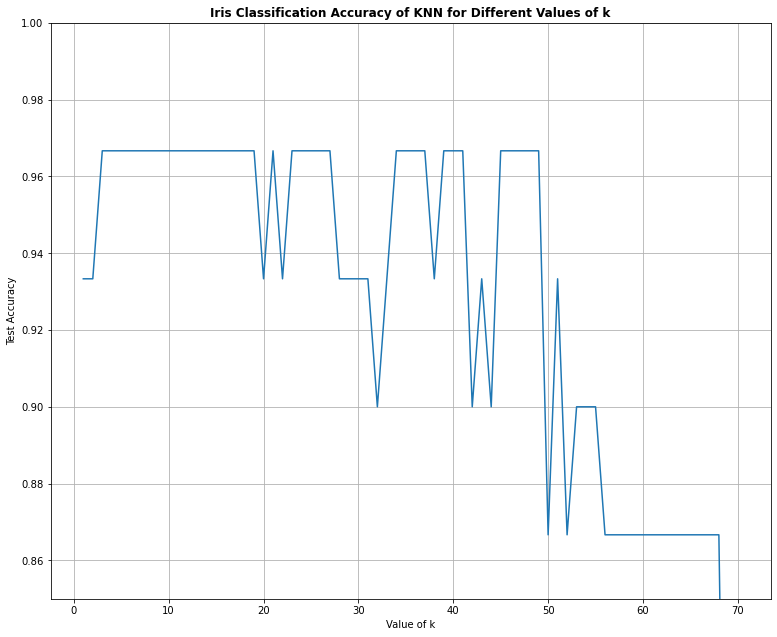

In [6]:
# get a list of accuracy scores for knn models with for k (from 1 to 70)
# my_performance = [sum(make_knn_predicition(k)==y_test)/len(y_test) for k in range(1, 71)] 
performance = [accuracy_score(y_test, make_knn_predicition(k)) for k in range(1,71)]


# instatiating plot figure
fig = plt.figure(figsize=(10,8))
axes = fig.add_axes([0,0,1,1])

# plot the performance for each k
axes.plot(range(1,71), performance)

# formatting
axes.set_title("Iris Classification Accuracy of KNN for Different Values of k", fontweight='bold')
axes.set_xlabel("Value of k")
axes.set_ylabel("Test Accuracy")
axes.grid()
axes.set_ylim(0.85, 1);